In [1]:
from APES import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Settings.SetBlockSize(100)

# Simple Example

/home/aqeel/miniconda3/envs/Kgpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


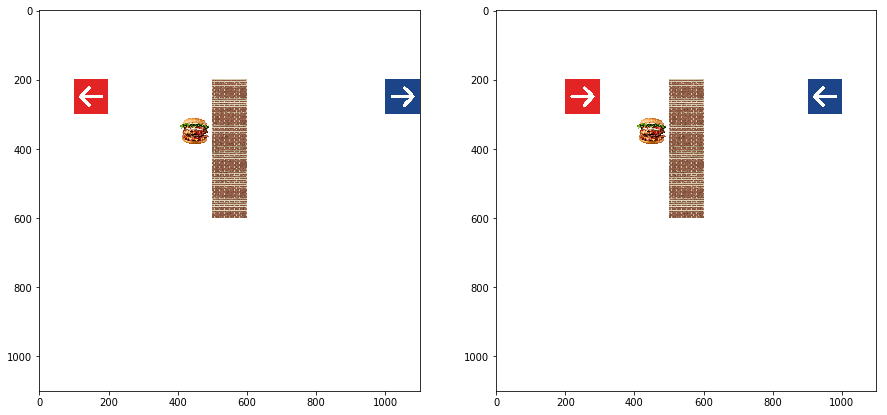

In [4]:
perf = {'sub':(2,1),'dom':(2,10),'food':(3,4),'obs':(3,5),'subdir':'W','domdir':'E','mesg':'example'}
game = CreateEnvironment(perf)

agents = [game.agents[i] for i in game.agents]

game.Step()
env_initial = game.BuildImage()

#Execute every time step
agents[0].NextAction = Settings.PossibleActions[2]
agents[1].NextAction = Settings.PossibleActions[3]

game.Step()
env_1step = game.BuildImage()

fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(env_initial)
ax[1].imshow(env_1step)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

# Complex Example that open more options.

/home/aqeel/miniconda3/envs/Kgpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


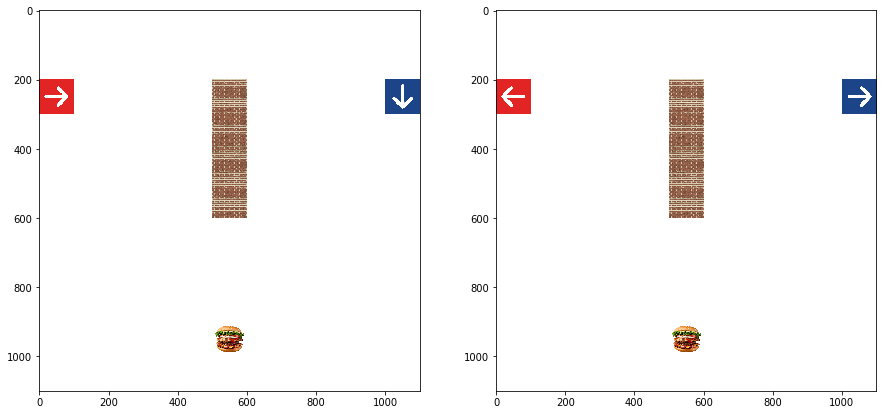

In [5]:
#Add pictures for items
Settings.AddImage('Wall','APES/Pics/wall.jpg')
Settings.AddImage('Food','APES/Pics/food.jpg')

#Create Probability distribution matrices (PDMs)
obs = np.zeros(Settings.WorldSize)
agnts = np.zeros(Settings.WorldSize)
food = np.zeros(Settings.WorldSize)

# Obstacles can appear from 3rd to 7th row and 5th column
obs[3:8,5] = 1 
agnts[2,[0,10]] = 1
food[:,4:7] = 1

#Add PDMs to Settings
Settings.AddProbabilityDistribution('Obs',obs) 
Settings.AddProbabilityDistribution('agnts',agnts)
Settings.AddProbabilityDistribution('food',food)

#Create World Elements
#Create vertical obastacle with length 4
obshape = np.array([[1],[1],[1],[1]]) 
obs = Obstacles('Wall',Shape=obshape,PdstName='Obs')

#Create two agents
ragnt = Agent(Fname='APES/Pics/red.jpg',PdstName='agnts')
bagnt = Agent(Fname='APES/Pics/blue.jpg',PdstName='agnts')
food = Foods('Food',PdstName='food')

#Reward food by 10, time step by -0.1
game = World(RewardsScheme=[0,10,-0.1])

#Adding Agents in Order of Following the action
game.AddAgents([ragnt,bagnt])
game.AddObstacles([obs])
game.AddFoods([food])

#Execute at the beginning of every episode
game.GenerateWorld()
game.Step()
env_initial = game.BuildImage()

#Execute every time step
bagnt.NextAction = Settings.PossibleActions[3]
ragnt.NextAction = Settings.PossibleActions[2]
game.Step()

env_1step = game.BuildImage()

fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(env_initial)
ax[1].imshow(env_1step)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()